# Import packages

In [1]:
import theano
import theano.tensor as T
import numpy as np
import h5py
def floatX(x):
    return np.asarray(x, dtype='float32')

Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 5103)


# Load data to VRAM

In [2]:
h5f = h5py.File('mnist.hdf5','r')
data_x = theano.shared(h5f['train_data'][()])
data_y = theano.shared(np.asarray(h5f['train_label'][()], dtype='int32'))

# Create parameters in VRAM

In [8]:
w1 = theano.shared( floatX(np.random.uniform(low=-0.1, high=0.1, size=(784, 100))), name='w1')
w2 = theano.shared( floatX(np.random.uniform(low=-0.1, high=0.1, size=(100, 10))), name='w2')
b1 = theano.shared( floatX(np.zeros((100,))), name='b1')
b2 = theano.shared( floatX(np.zeros((10,))), name='b2')
params = [w1,w2,b1,b2]

# Model definition

$h_1=\sigma(w_1 x+b_1)$

$y=\sigma(w_2 h_1+b_2)$

$cost = -\frac{1}{N}\sum\limits_{i=1}^N \log y_i^{t_i} $ (Cross Entropy)

In [9]:
x = T.matrix('x')
t = T.ivector('t')
h1 = T.nnet.sigmoid(T.dot(x,w1)+b1)
y = T.nnet.softmax(T.dot(h1,w2)+b2)
cost = -T.mean(T.log(y)[T.arange(t.shape[0]), t])
acc = T.mean( T.eq(T.argmax(y, axis=1), t))

# Compile function

In [10]:
i = T.iscalar('i')
batch_size = 200
n_batches = int(data_x.get_value().shape[0] / batch_size)

grads = T.grad(cost, params)
nu = 0.01
updates = [(p, p-nu*grad) for p,grad in zip(params, grads)]
train_model = theano.function([i], [cost, acc], updates=updates, 
                              givens=[(x,data_x[i*batch_size:(i+1)*batch_size]),
                                      (t,data_y[i*batch_size:(i+1)*batch_size])])

# Training

In [11]:
for epoch in xrange(100):
    cost_vals = []
    acc_vals = []
    for bi in xrange(n_batches):
        cost_val, acc_val = train_model(bi)
        cost_vals.append(cost_val)
        acc_vals.append(acc_val)
    print("Epoch {} Cost {} Acc {}".format(epoch, np.mean(cost_vals), np.mean(acc_vals)))

Epoch 0 Cost 2.26422357559 Acc 0.22156
Epoch 1 Cost 2.15842342377 Acc 0.47632
Epoch 2 Cost 2.0371696949 Acc 0.58894
Epoch 3 Cost 1.89009952545 Acc 0.64196
Epoch 4 Cost 1.72356593609 Acc 0.6762
Epoch 5 Cost 1.55348849297 Acc 0.70726
Epoch 6 Cost 1.39543533325 Acc 0.73542
Epoch 7 Cost 1.25774168968 Acc 0.75892
Epoch 8 Cost 1.14178979397 Acc 0.7756
Epoch 9 Cost 1.04535830021 Acc 0.78998
Epoch 10 Cost 0.965214848518 Acc 0.8017
Epoch 11 Cost 0.898273944855 Acc 0.81156
Epoch 12 Cost 0.841935038567 Acc 0.82006
Epoch 13 Cost 0.794103860855 Acc 0.827
Epoch 14 Cost 0.753123521805 Acc 0.83364
Epoch 15 Cost 0.717692553997 Acc 0.83866
Epoch 16 Cost 0.686789929867 Acc 0.84382
Epoch 17 Cost 0.659613609314 Acc 0.84854
Epoch 18 Cost 0.635531485081 Acc 0.85212
Epoch 19 Cost 0.614042699337 Acc 0.85588
Epoch 20 Cost 0.594747662544 Acc 0.8584
Epoch 21 Cost 0.577325642109 Acc 0.86158
Epoch 22 Cost 0.561516344547 Acc 0.8644
Epoch 23 Cost 0.547107160091 Acc 0.8671
Epoch 24 Cost 0.533922493458 Acc 0.86948
Epoc

Populating the interactive namespace from numpy and matplotlib


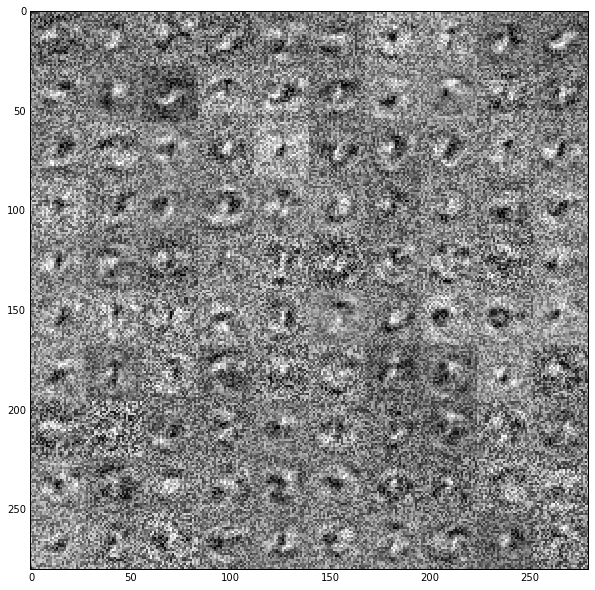

In [14]:
import matplotlib.pyplot as plt
%pylab inline
size_h = 28
size_w = 28
def viz_tile_images(imgs, n_col=10, normalize=True):
    num = imgs.shape[0]
    n_row = int((num-1)/n_col)+1
    total_img = np.zeros((n_row*size_h, n_col*size_w))
    for r in xrange(n_row):
        for c in xrange(n_col):
            idx = r*n_col+c
            if idx < num:
                img = np.reshape(imgs[idx], (size_w, size_h))
                if normalize:
                    img = (img - np.min(img))/(np.max(img) - np.min(img))
                total_img[r*size_h:(r+1)*size_h, c*size_w:(c+1)*size_w] = img
    
    orig_fig_size = plt.rcParams['figure.figsize']
    plt.rcParams['figure.figsize'] = (n_col,n_row)
    plt.imshow(total_img, cmap=plt.get_cmap('gray'), interpolation='nearest')
    plt.rcParams['figure.figsize'] = orig_fig_size
    

viz_tile_images(w1.get_value().T)